In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# عشان نعرض الرسوم البيانية في الـ notebook على طول
%matplotlib inline

In [ ]:
df=pd.read_excel('/content/01JRKPRM0BJ7WM5W18PT11RQJW.xlsx')

In [ ]:
df.head(5)

,Order_ID,Order_Date,Product_ID,Sales_Rep_ID,Region_ID,Quantity_Sold,Unit_Price,Total_Sales,Profit,Return_Flag,Time,Year,Month,Day_of_Week,Hour
0,1001,2024-09-05,202,305,101,2,523.336,1046.672,198.86768,False,23:47,2024,9,Thursday,23
1,1002,2023-12-13,204,301,105,1,49.412,49.412,10.37652,False,16:50,2023,12,Wednesday,16
2,1003,2023-09-17,201,303,101,3,253.660,760.980,190.24500,False,09:00,2023,9,Sunday,9
3,1004,2022-12-24,204,301,105,2,380.622,761.244,228.37320,False,06:50,2022,12,Saturday,6
4,1005,2023-08-05,202,303,102,2,190.498,380.996,57.14940,False,10:42,2023,8,Saturday,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       2000 non-null   int64         
 1   Order_Date     2000 non-null   datetime64[ns]
 2   Product_ID     2000 non-null   int64         
 3   Sales_Rep_ID   2000 non-null   int64         
 4   Region_ID      2000 non-null   int64         
 5   Quantity_Sold  2000 non-null   int64         
 6   Unit_Price     2000 non-null   float64       
 7   Total_Sales    2000 non-null   float64       
 8   Profit         2000 non-null   float64       
 9   Return_Flag    2000 non-null   bool          
 10  Time           2000 non-null   object        
 11  Year           2000 non-null   int64         
 12  Month          2000 non-null   int64         
 13  Day_of_Week    2000 non-null   object        
 14  Hour           2000 non-null   int64         
dtypes: bool(1), datetime6

In [ ]:
df.columns

Index(['Order_ID', 'Order_Date', 'Product_ID', 'Sales_Rep_ID', 'Region_ID',
       'Quantity_Sold', 'Unit_Price', 'Total_Sales', 'Profit', 'Return_Flag',
       'Time', 'Year', 'Month', 'Day_of_Week', 'Hour'],
      dtype='object')

In [ ]:
# هنشوف عدد القيم المفقودة في كل عمود
print(df.isnull().sum())

# لو عايزين نملا القيم المفقودة بقيمة معينة (مثلاً 0)
# df.fillna(0, inplace=True)

# لو عايزين نحذف الصفوف اللي فيها قيم مفقودة
# df.dropna(inplace=True)

# لو عايزين نحذف الأعمدة اللي فيها قيم مفقودة بنسبة كبيرة (مثلاً أكتر من 50%)
# threshold = len(df) * 0.5
# df.dropna(thresh=threshold, axis=1, inplace=True)

Order_ID         0
Order_Date       0
Product_ID       0
Sales_Rep_ID     0
Region_ID        0
Quantity_Sold    0
Unit_Price       0
Total_Sales      0
Profit           0
Return_Flag      0
Time             0
Year             0
Month            0
Day_of_Week      0
Hour             0
dtype: int64


In [ ]:
# هنشوف أنواع البيانات في كل عمود
print(df.dtypes)

# لو عايزين نحول عمود التاريخ لنوع تاريخ
# df['Date'] = pd.to_datetime(df['Date'])

# لو عايزين نحول عمود رقمي لنوع رقمي
# df['Sales'] = pd.to_numeric(df['Sales'])

Order_ID                  int64
Order_Date       datetime64[ns]
Product_ID                int64
Sales_Rep_ID              int64
Region_ID                 int64
Quantity_Sold             int64
Unit_Price              float64
Total_Sales             float64
Profit                  float64
Return_Flag                bool
Time                     object
Year                      int64
Month                     int64
Day_of_Week              object
Hour                      int64
dtype: object


In [ ]:
# هنشوف عدد الصفوف المكررة
print(df.duplicated().sum())

# هنحذف الصفوف المكررة
# df.drop_duplicates(inplace=True)

# هنشوف عدد الأعمدة المكررة
# print(df.T.duplicated().sum())

# هنحذف الأعمدة المكررة
# df = df.loc[:, ~df.T.duplicated()]

0


In [ ]:
# لو عايزين نوحد تنسيق عمود معين (مثلاً نخليه كله حروف صغيرة)
# df['Product'] = df['Product'].str.lower()

# لو عايزين نشيل المسافات الزيادة من بداية ونهاية النصوص
# df['Product'] = df['Product'].str.strip()

In [ ]:
# هنحول عمود التاريخ لنوع تاريخ لو مكنش تاريخ بالفعل
if df['Order_Date'].dtype != 'datetime64[ns]':
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# هنخلّي عمود التاريخ هو الـ index عشان نعرف نعمل resampling
df.set_index('Order_Date', inplace=True)

# حساب نمو المبيعات الشهري
monthly_sales = df['Total_Sales'].resample('M').sum()  # استخدمنا 'Total_Sales' بدلاً من 'Sales'
monthly_sales_shift = monthly_sales.shift(1)
monthly_sales_growth = (
    (monthly_sales - monthly_sales_shift) / monthly_sales_shift
) * 100

# حساب نمو المبيعات السنوي
yearly_sales = df['Total_Sales'].resample('Y').sum()  # استخدمنا 'Total_Sales' بدلاً من 'Sales'
yearly_sales_shift = yearly_sales.shift(1)
yearly_sales_growth = (
    (yearly_sales - yearly_sales_shift) / yearly_sales_shift
) * 100

print("Monthly Sales Growth:")
print(monthly_sales_growth)

print("\nYearly Sales Growth:")
print(yearly_sales_growth)

# هنرجع الـ index لأصله عشان ممكن نحتاجه في حاجات تانية
df.reset_index(inplace=True)

Monthly Sales Growth:
Order_Date
2022-10-31           NaN
2022-11-30    433.002756
2022-12-31     28.874283
2023-01-31    -25.168918
2023-02-28    -15.557561
2023-03-31     28.848471
2023-04-30    -12.334168
2023-05-31     14.158660
2023-06-30     -1.185318
2023-07-31     -6.298421
2023-08-31      0.071981
2023-09-30     19.240034
2023-10-31    -24.491327
2023-11-30     13.638576
2023-12-31     16.649983
2024-01-31    -24.106889
2024-02-29     14.919518
2024-03-31    -24.506802
2024-04-30     25.134169
2024-05-31     12.163285
2024-06-30      8.386376
2024-07-31    -16.081219
2024-08-31     10.081529
2024-09-30    -21.989133
2024-10-31      3.331081
Freq: ME, Name: Total_Sales, dtype: float64

Yearly Sales Growth:
Order_Date
2022-12-31           NaN
2023-12-31    383.529268
2024-12-31    -19.767618
Freq: YE-DEC, Name: Total_Sales, dtype: float64


<ipython-input-31-234931b2732a>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total_Sales'].resample('M').sum()  # استخدمنا 'Total_Sales' بدلاً من 'Sales'
<ipython-input-31-234931b2732a>:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df['Total_Sales'].resample('Y').sum()  # استخدمنا 'Total_Sales' بدلاً من 'Sales'


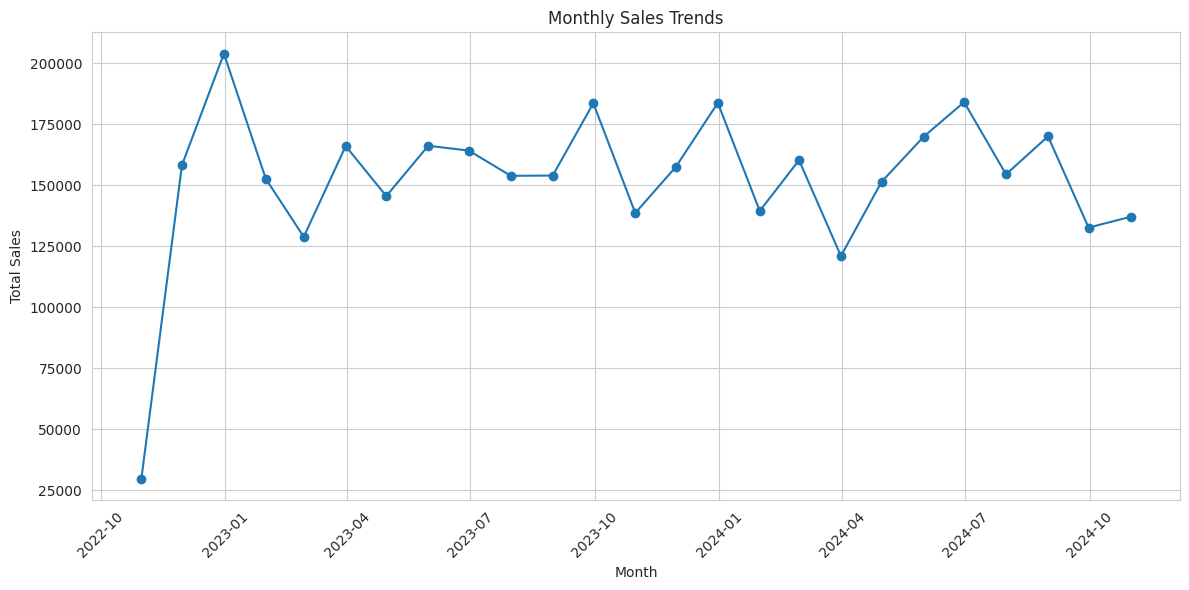

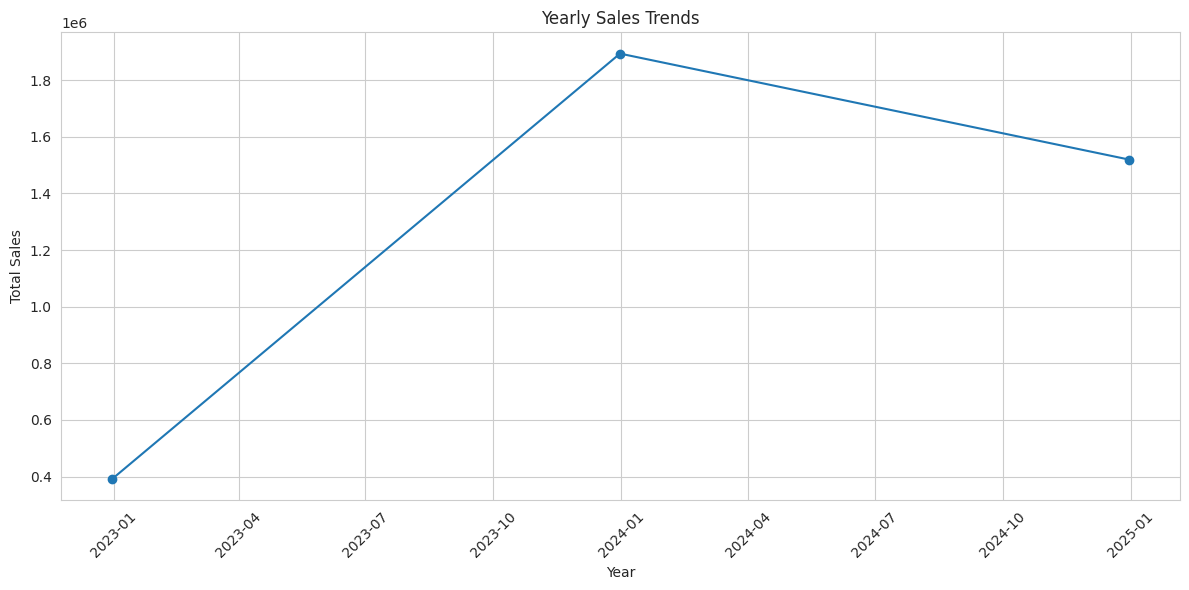

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# هنخلي شكل الرسوم البيانية أحلى
sns.set_style("whitegrid")

# 1. Monthly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')  # استخدمنا 'Total Sales'
plt.xticks(rotation=45)  # عشان نخلي تسميات الشهور واضحة
plt.tight_layout()
plt.show()

# 2. Yearly Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')  # استخدمنا 'Total Sales'
plt.xticks(rotation=45)  # عشان نخلي تسميات السنين واضحة
plt.tight_layout()
plt.show()

<ipython-input-33-42c8508dcd87>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


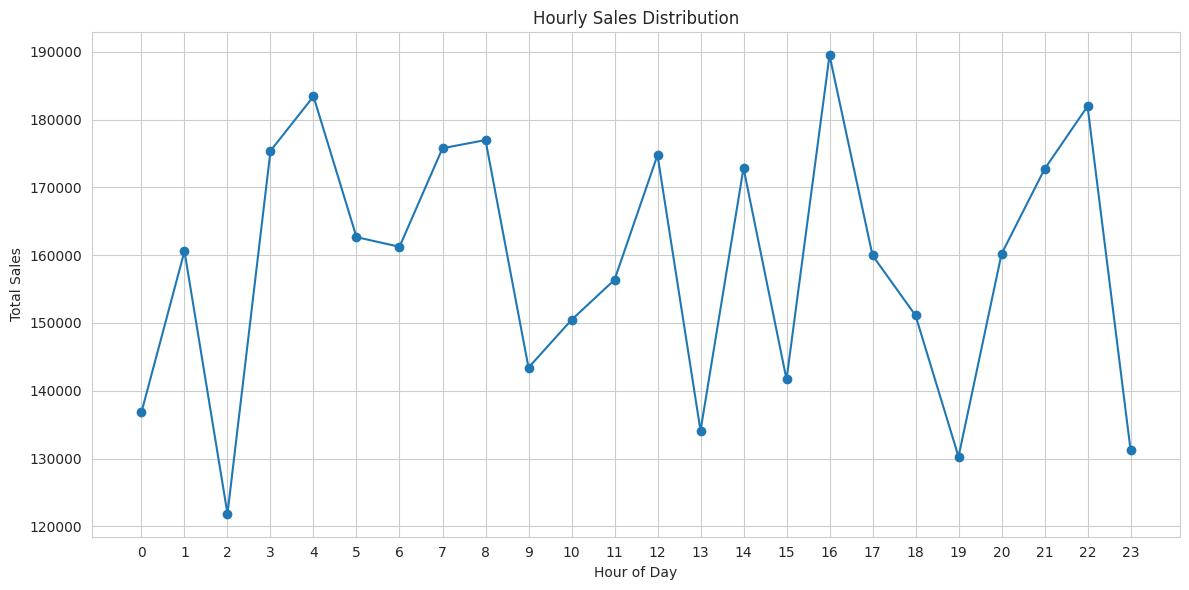

In [ ]:
# هنحول عمود 'Time' لنوع datetime لو مكنش datetime بالفعل
if df['Time'].dtype != 'datetime64[ns]':
    df['Time'] = pd.to_datetime(df['Time'])

# هنستخرج الساعة من عمود 'Time' ونحطها في عمود جديد اسمه 'Hour'
df['Hour'] = df['Time'].dt.hour

# هنحسب إجمالي المبيعات لكل ساعة
hourly_sales = df.groupby('Hour')['Total_Sales'].sum()  # استخدمنا 'Total_Sales'

# هنعمل رسم بياني خطي لتوزيع المبيعات بالساعة
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')  # استخدمنا 'Total Sales'
plt.xticks(hourly_sales.index)  # هنعرض كل الساعات على المحور السيني
plt.grid(True)
plt.tight_layout()
plt.show()

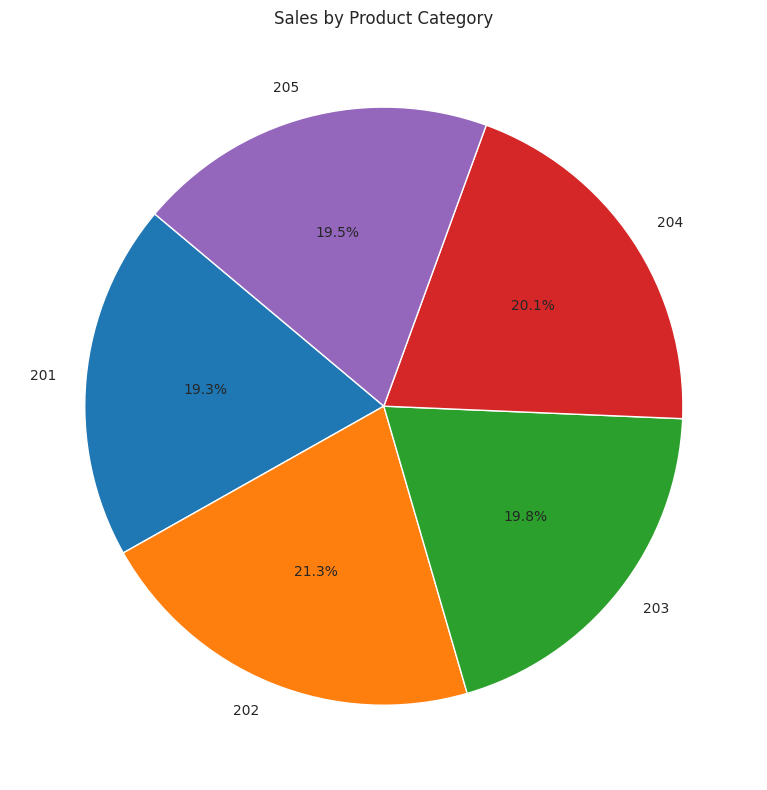

In [ ]:
# هنحسب إجمالي المبيعات لكل فئة منتج
category_sales = df.groupby('Product_ID')['Total_Sales'].sum()  # استخدمنا 'Total_Sales'

# هنعمل رسم بياني دائري لتوزيع المبيعات حسب فئة المنتج
plt.figure(figsize=(8, 8))
plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
)  # هنستخدم قيم ومسميات الفئات
plt.title('Sales by Product Category')
plt.tight_layout()
plt.show()

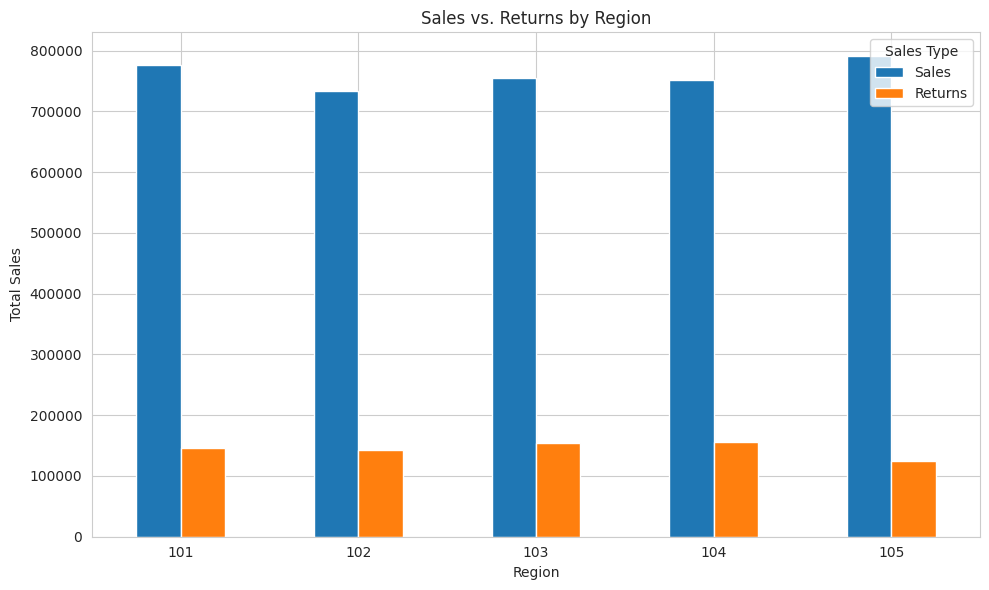

In [ ]:
# هنحسب إجمالي المبيعات والمرتجعات لكل منطقة (هنفترض إن 'Region_ID' هو اسم عمود المنطقة)
sales_by_region = df.groupby('Region_ID')['Total_Sales'].sum()  # استخدمنا 'Total_Sales'
returns_by_region = df[df['Return_Flag'] == 1].groupby('Region_ID')['Total_Sales'].sum()  # استخدمنا 'Total_Sales'

# هنجمعهم في DataFrame واحد عشان نعرف نرسمهم مع بعض
sales_returns = pd.DataFrame({'Sales': sales_by_region, 'Returns': returns_by_region}).fillna(0)

# هنعمل رسم بياني شريطي مقارن
sales_returns.plot(kind='bar', figsize=(10, 6))
plt.title('Sales vs. Returns by Region')
plt.xlabel('Region')  # هنفترض إن 'Region' هو اسم عمود المنطقة
plt.ylabel('Total Sales')  # استخدمنا 'Total Sales'
plt.xticks(rotation=0)
plt.legend(title='Sales Type')
plt.tight_layout()
plt.show()

<ipython-input-36-01e17aaea0e0>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit_margin = df.resample('M', on='Order_Date')['Profit Margin'].mean()


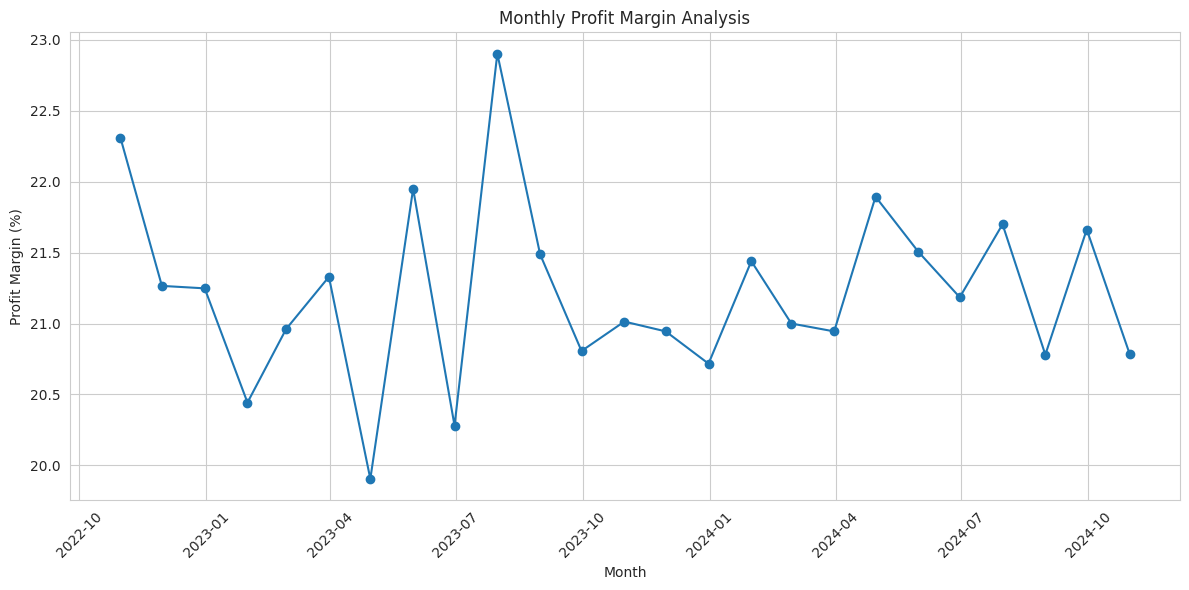

In [ ]:
# هنحسب هامش الربح
df['Profit Margin'] = (df['Profit'] / df['Total_Sales']) * 100  # استخدمنا 'Total_Sales'

# هنحسب هامش الربح الشهري
monthly_profit_margin = df.resample('M', on='Order_Date')['Profit Margin'].mean()

# هنعمل رسم بياني خطي لهامش الربح الشهري
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_margin.index, monthly_profit_margin.values, marker='o')
plt.title('Monthly Profit Margin Analysis')
plt.xlabel('Month')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# حساب المقاييس المطلوبة
total_sales = df['Total_Sales'].sum()
total_quantity_sold = df['Quantity_Sold'].sum()
total_profit = df['Profit'].sum()
average_order_size = df['Total_Sales'].sum() / df['Quantity_Sold'].sum()
# Sales Growth Rate تم حسابه سابقًا
# Return Rate مش موجود في البيانات

# عرض المقاييس
print("KPIs Summary")
print(f"Total Sales: {total_sales}")
print(f"Total Quantity Sold: {total_quantity_sold}")
print(f"Total Profit: {total_profit}")
print(f"Average Order Size: {average_order_size}")
print(f"Monthly Sales Growth Rate: \n{monthly_sales_growth.tail(1)}")  # عرض آخر قيمة للنمو الشهري
print(f"Yearly Sales Growth Rate: \n{yearly_sales_growth.tail(1)}")  # عرض آخر قيمة للنمو السنوي
# print(f"Return Rate: {return_rate}")  # مش موجود في البيانات

KPIs Summary
Total Sales: 3805354.4980000006
Total Quantity Sold: 10822
Total Profit: 808671.0926800001
Average Order Size: 351.6313526150435
Monthly Sales Growth Rate: 
Order_Date
2024-10-31    3.331081
Freq: ME, Name: Total_Sales, dtype: float64
Yearly Sales Growth Rate: 
Order_Date
2024-12-31   -19.767618
Freq: YE-DEC, Name: Total_Sales, dtype: float64


In [ ]:
# أعلى المنتجات
top_products = df.groupby('Product_ID')['Total_Sales'].sum().nlargest(2)
print("\nTop 2 Products by Total Sales:")
print(top_products)

# أعلى المناطق
top_regions = df.groupby('Region_ID')['Total_Sales'].sum().nlargest(2)
print("\nTop 2 Regions by Total Sales:")
print(top_regions)

# أعلى العملاء (نفترض أن 'Customer ID' هو معرف العميل.  مفيش عمود بالاسم ده، ممكن تستخدم عمود تاني لو موجود)
# top_customers = df.groupby('Customer ID')['Total_Sales'].sum().nlargest(2)  # استبدل 'Customer ID' باسم العمود المناسب
# print("\nTop 2 Customers by Total Sales:")
# print(top_customers)


Top 2 Products by Total Sales:
Product_ID
202    811733.956
204    765034.138
Name: Total_Sales, dtype: float64

Top 2 Regions by Total Sales:
Region_ID
105    790392.812
101    776336.550
Name: Total_Sales, dtype: float64


In [ ]:
# استخراج اليوم من الأسبوع
df['Day_of_Week'] = df['Order_Date'].dt.day_name()

# حساب المبيعات لكل يوم
sales_by_day = df.groupby('Day_of_Week')['Total_Sales'].sum().reindex(
    [
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday',
    ]
)  # لضمان ترتيب الأيام الصحيح

# عرض المبيعات حسب اليوم
print("\nSales by Day of the Week:")
print(sales_by_day)


Sales by Day of the Week:
Day_of_Week
Monday       453159.872
Tuesday      545283.486
Wednesday    582656.382
Thursday     593086.912
Friday       560584.750
Saturday     572166.496
Sunday       498416.600
Name: Total_Sales, dtype: float64


In [ ]:
# حساب أداء مندوبي المبيعات
sales_rep_performance = df.groupby('Sales_Rep_ID').agg({'Total_Sales': 'sum', 'Quantity_Sold': 'sum'})
sales_rep_performance_ranked = sales_rep_performance.sort_values(
    by='Total_Sales', ascending=False
)

# عرض أداء مندوبي المبيعات
print("\nSales Rep Performance:")
print(sales_rep_performance_ranked)


Sales Rep Performance:
              Total_Sales  Quantity_Sold
Sales_Rep_ID                            
303            847191.378           2332
304            777654.658           2180
302            740546.862           2182
305            727409.452           2060
301            712552.148           2068
